In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
filename="covid19-global-forecasting-week-4\\train.csv"
df=pd.read_csv(filename)
print(df.head())

   Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0


In [2]:
infections=df['ConfirmedCases'].values[11060:11139]
#print(infections)

In [3]:
index = pd.DatetimeIndex(['2020-01-22','2020-01-23','2020-01-24','2020-01-25','2020-01-26','2020-01-27','2020-01-28',
'2020-01-29','2020-01-30','2020-01-31','2020-02-01','2020-02-02','2020-02-03','2020-02-04','2020-02-05','2020-02-06',
'2020-02-07','2020-02-08','2020-02-09','2020-02-10','2020-02-11','2020-02-12','2020-02-13','2020-02-14','2020-02-15',
'2020-02-16','2020-02-17','2020-02-18','2020-02-19','2020-02-20','2020-02-21','2020-02-22','2020-02-23','2020-02-24',
'2020-02-25','2020-02-26','2020-02-27','2020-02-28','2020-02-29','2020-03-01','2020-03-02','2020-03-03','2020-03-04',
'2020-03-05','2020-03-06','2020-03-07','2020-03-08','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13',
'2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-21','2020-03-22',
'2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-28','2020-03-29','2020-03-30','2020-03-31',
'2020-04-01','2020-04-02','2020-04-03','2020-04-04','2020-04-05','2020-04-06','2020-04-07','2020-04-08','2020-04-09'])
series = pd.Series(infections, index=index)

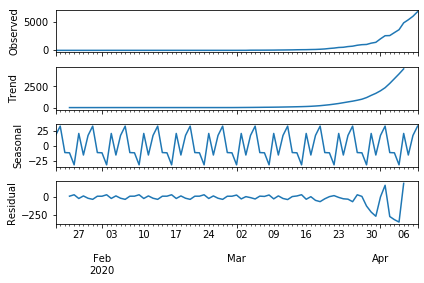

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

In [11]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\KIIT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2020-04-10     6896.834014
2020-04-11     7471.260291
2020-04-12     8045.686569
2020-04-13     8620.112846
2020-04-14     9194.539123
2020-04-15     9768.965400
2020-04-16    10343.391677
2020-04-17    10917.817954
2020-04-18    11492.244231
2020-04-19    12066.670508
2020-04-20    12641.096785
2020-04-21    13215.523063
Freq: D, Name: Holt's linear trend, dtype: float64


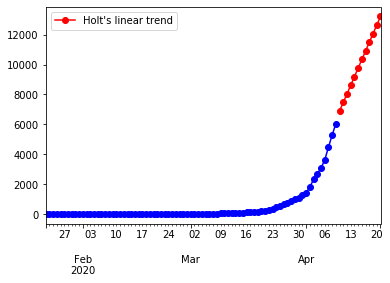

In [55]:
fit1 = Holt(series).fit(smoothing_level=0.4, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

print(fcast1)


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='red', marker="o", legend=True)


plt.show()